# Identifying sentences that convey meaningful semantic relation between entities within the sentence - Exploratory Data Analysis (EDA)


The objective of this notebook is to present a brief exploratory data analysis (EDA) of the sampled dataset that will be later used.

In [68]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

## Part 1: Named Entities EDA

The Named Entities analysis was conducted during the dataset generation.
The distribution of named entity occurances, along with their corresponding labels, follows a heavy-tail distibution pattern, as can be seen below:

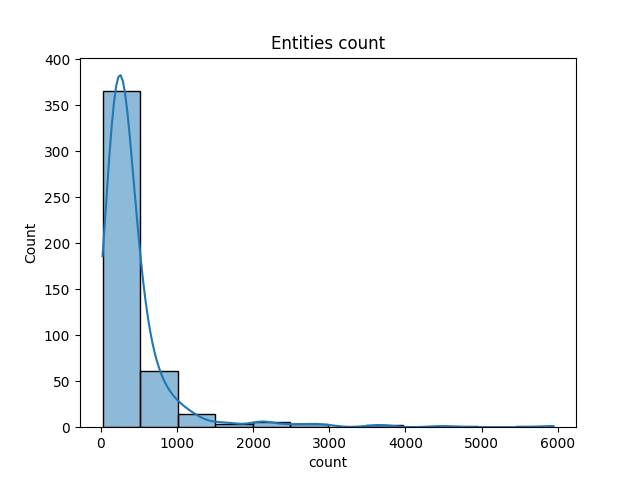

In [69]:
Image(filename='./sampled_sentences_stats/entities_count.png')

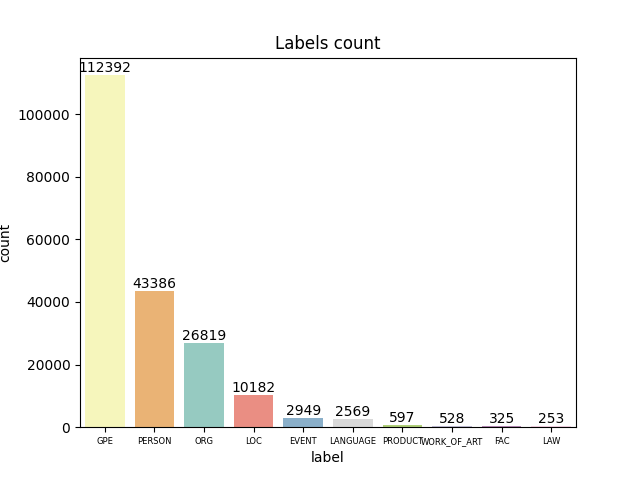

In [70]:
Image(filename='./sampled_sentences_stats/labels_count.png')

We can see that Named-entities pairs follow a heavy-tail distibution as well:

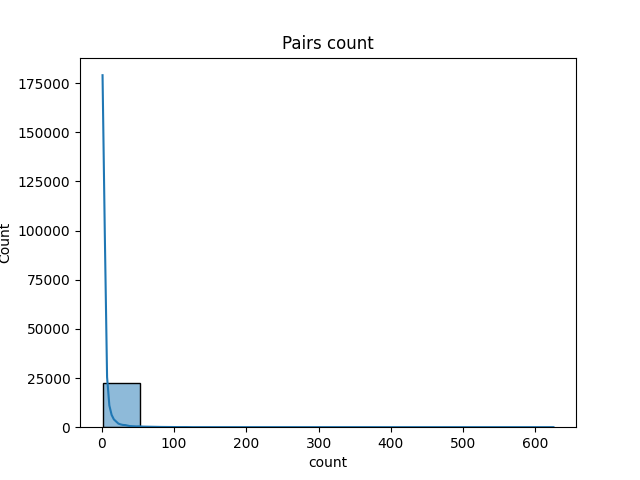

In [71]:
Image(filename='./sampled_sentences_stats/pairs_count.png')

The occurrences of the paired labels can be visualized using a heatmap. For instance, it can be observed that pairs labeled as GPE-GPE (geopolitical entities) are the most common.

Other frequent combinations include: GPE-LOC (geopolitical entity - location), GPE-ORG (geopolitical entity - organization), GPE-PERSON, LOC-LOC (location - location), ORG-ORG (organization - organization), ORG-PERSON, and PERSON-PERSON.

*Notes:*

* In this context, each pair is counted twice due to the symmetric nature of the relation. For example, a pair consisting of GPE and PERSON will be counted once as (GPE, PERSON) and then again as (PERSON, GPE).

* In the original dataset, there were more occurrences of the PERSON-PERSON relation compared to the GPE-GPE relation. However, in the sampled dataset, this relation is reversed. One possible explanation for this is that names of individual people are fewer by nature compared to names of places. As a result, fewer person named entities met the requirement of appearing more than 1000 times in the texts.


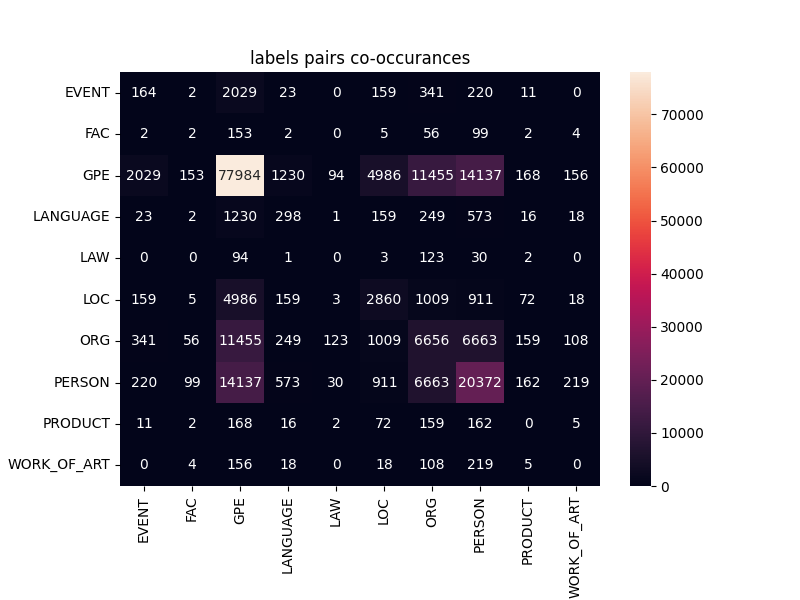

In [72]:
Image(filename='./sampled_sentences_stats/pairs_labels_count.png')

## Part 2: Exploring the Mutual Information (MI) Score

### Exploring the MI for the entire dataset

The mutual information (MI) analysis also reveals a clear power-law distribution. It is apparent that lower MI values occur frequently, indicating a lower level of relationship between the entities. Conversely, entities with a higher level of relationship are less common.

In [73]:
dataset_path = '../data/data.csv'
df = pd.read_csv(dataset_path)

In [74]:
df['mi_score'].describe()

count    1.000000e+05
mean     5.106924e-05
std      1.522974e-04
min      5.764400e-09
25%      3.477038e-07
50%      3.442040e-06
75%      3.025925e-05
max      1.185945e-03
Name: mi_score, dtype: float64

Text(0.5, 1.0, 'Mutial information distribution')

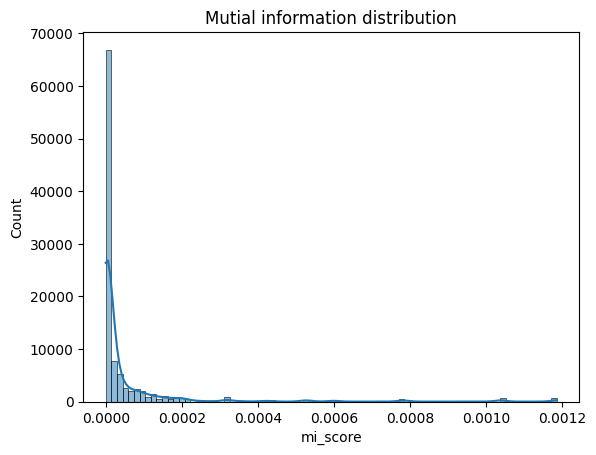

In [75]:
sns.histplot(data=df['mi_score'], kde=True, binrange=(min(df['mi_score']), max(df['mi_score'])), bins=80)
plt.title('Mutial information distribution')

In [76]:
sorted_df = df.sort_values(by='mi_score', ascending=False)

The 5 pairs with highest MI score:

In [91]:
for index, s in sorted_df.head(5).iterrows():
    print(f'{s.sent_id} {s.ent1} {s.label1} {s.ent2} {s.label2} {s.mi_score} {s.sent}')

2250619 Mulder PERSON Scully PERSON 0.0011859454643136 Mulder is a believer in the paranormal, while the skeptical Scully has been assigned to debunk his work.
1167625 Mulder PERSON Scully PERSON 0.0011859454643136 When Mulder and Scully travel to Iowa and meet the Morrises, Mulder observes Kevin writing down binary code on a piece of paper; Kevin claims they are coming from static on a television screen.
1167633 Scully PERSON Mulder PERSON 0.0011859454643136 On his person, they find a note in his wallet that eventually leads Scully and Mulder to conclude that it was Tessa, not Ruby, who was pregnant.
1167637 Mulder PERSON Scully PERSON 0.0011859454643136 A motorcycle gang appears, and as Mulder hurries to rescue Kevin from their wake, Scully discovers Ruby nearby.


The 5 pairs with lowest MI score:

In [92]:
for index, s in sorted_df.tail(5).iterrows():
    print(f'{s.sent_id} {s.ent1} {s.label1} {s.ent2} {s.label2} {s.mi_score} {s.sent}')

2604856 Moon PERSON Mitchell PERSON 5.7644279664117864e-09 During an Inside Soap feature on the Moon brothers vs the Mitchell brothers, Kate Woodward said "Two sexy brothers to shake up Albert Square?
1453937 Barcelona GPE YouTube ORG 5.764424474222823e-09 During the 2010 Sant Jordi festivities in Barcelona, the (350 +) staff in one of the main buildings of the Polytechnic University of Catalonia used the ostensibly massive amounts of free time available to them to perform a notorious lip dub of the song that reached over 150000 views on YouTube.
966689 Burns PERSON Love WORK_OF_ART 5.7644051665657795e-09 Mr. Burns himself has been involved with several women and in "A Hunka Hunka Burns in Love", Smithers is noticeably disgusted when Mr. Burns starts looking for a female companion.
234419 Lucas PERSON Bush PERSON 5.764400546024309e-09 Despite Lucas' insistence to the contrary, The Seattle Times concluded, "Without naming Bush or the Patriot Act, it's all unmistakable no matter what you

### Exploring the MI for each labels-pair

I decided to display only the top 8 label pairs in the dataset for mutual information (MI) analysis. As expected, we often observe a power-law distribution, with an additional cluster representing the pairs that frequently appeared together.

In [96]:
def plot_type_mi_hist_plot(df, type1, type2, bins='auto'):
    df1 = df[( (df['label1'] == type1) & (df['label2'] == type2) ) | ( (df['label2'] == type1) & (df['label1'] == type2) )]
    sns.histplot(data=df1['mi_score'], kde=True, bins=bins)
    plt.title(f'Mutial information distribution for labels: {type1}-{type2}')
    print(df1['mi_score'].describe())

count    3.899200e+04
mean     5.947815e-05
std      1.445323e-04
min      5.768865e-09
25%      1.193613e-06
50%      1.132706e-05
75%      5.832404e-05
max      1.038628e-03
Name: mi_score, dtype: float64


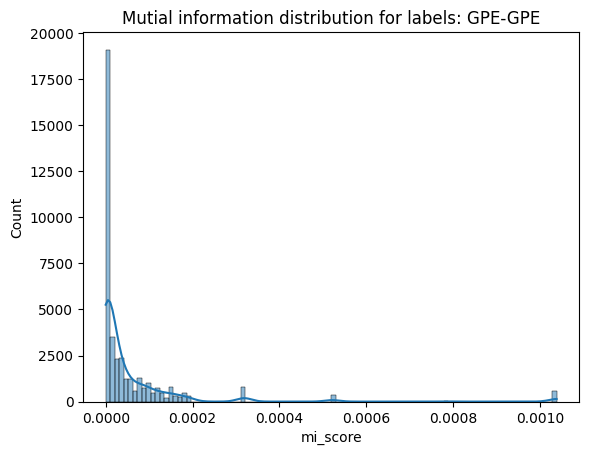

In [100]:
plot_type_mi_hist_plot(df, 'GPE', 'GPE', bins=100)

In [104]:
plot_type_mi_hist_plot(df, 'GPE', 'LOC')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4096312972.py, line 1)

count    1.145500e+04
mean     4.917119e-05
std      1.633839e-04
min      5.764424e-09
25%      1.722556e-07
50%      1.222780e-06
75%      9.305966e-06
max      7.826586e-04
Name: mi_score, dtype: float64


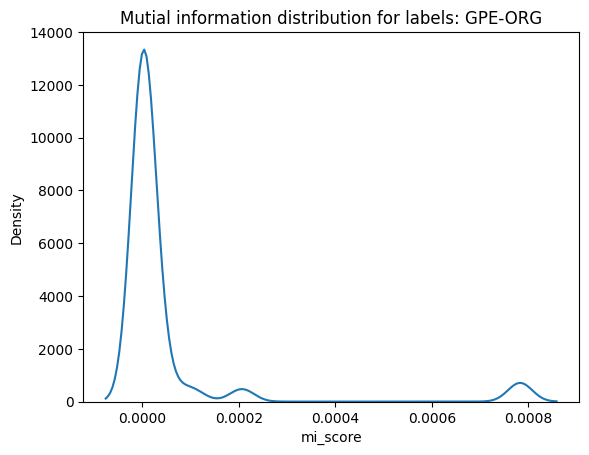

In [82]:
plot_type_mi_KDE_plot(df, 'GPE', 'ORG')

count    1.413700e+04
mean     5.839676e-06
std      1.430115e-05
min      5.764933e-09
25%      9.432187e-08
50%      5.502270e-07
75%      3.200523e-06
max      2.064815e-04
Name: mi_score, dtype: float64


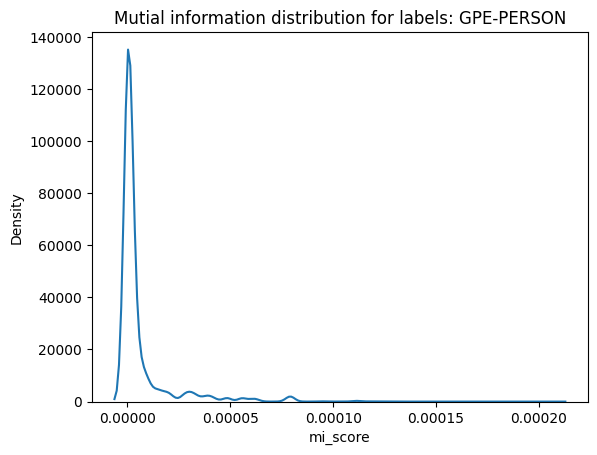

In [83]:
plot_type_mi_KDE_plot(df, 'GPE', 'PERSON')

count    1.430000e+03
mean     2.111700e-04
std      2.394752e-04
min      5.805533e-09
25%      2.326985e-05
50%      7.320430e-05
75%      5.989429e-04
max      5.989429e-04
Name: mi_score, dtype: float64


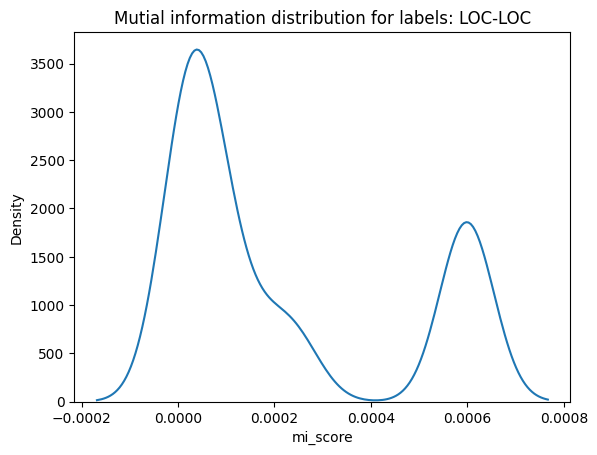

In [84]:
plot_type_mi_KDE_plot(df, 'LOC', 'LOC')

count    3.328000e+03
mean     3.479025e-05
std      5.407429e-05
min      5.769882e-09
25%      6.518452e-07
50%      8.302867e-06
75%      4.205842e-05
max      2.215898e-04
Name: mi_score, dtype: float64


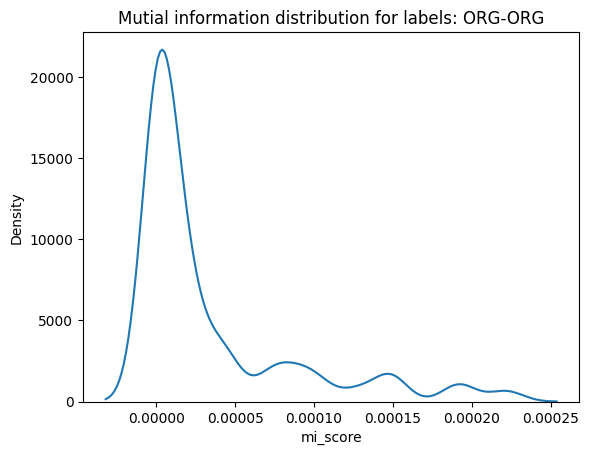

In [85]:
plot_type_mi_KDE_plot(df, 'ORG', 'ORG')

count    6.663000e+03
mean     1.245501e-05
std      3.484878e-05
min      5.764400e-09
25%      1.450840e-07
50%      1.500509e-06
75%      9.101996e-06
max      7.826586e-04
Name: mi_score, dtype: float64


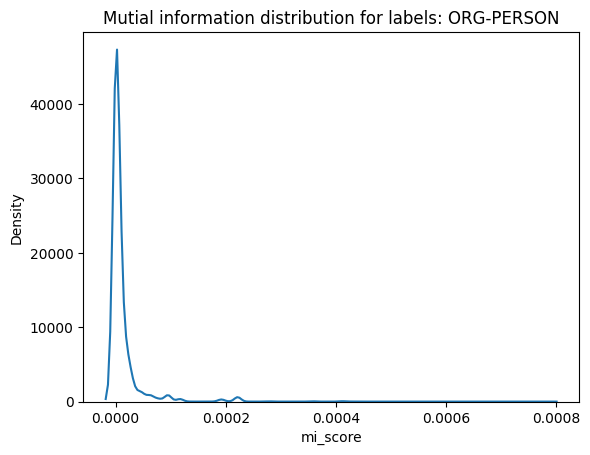

In [86]:
plot_type_mi_KDE_plot(df, 'ORG', 'PERSON')

count    1.018600e+04
mean     1.380514e-04
std      2.962442e-04
min      5.764401e-09
25%      5.681256e-07
50%      9.206588e-06
75%      1.057591e-04
max      1.185945e-03
Name: mi_score, dtype: float64


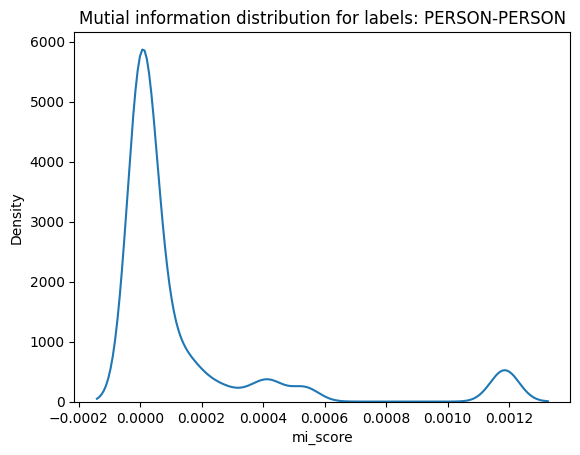

In [87]:
plot_type_mi_KDE_plot(df, 'PERSON', 'PERSON')

## Part 3: Exploring sentences length

<AxesSubplot: >

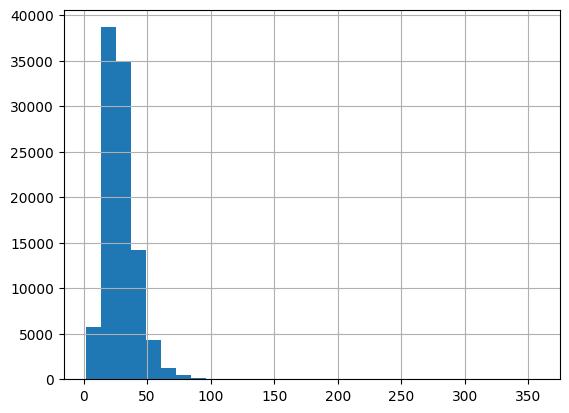

In [88]:
seq_len = [len(i.split()) for i in df['sent']]

pd.Series(seq_len).hist(bins = 30)